In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import pickle

## 1.Đọc dữ liệu

In [2]:
df = pd.read_csv('D:/HK6/BA/Project_StockJPX/Data/stock_prices.csv', parse_dates=['Date'])

## 2. Tiền xử lý - Chia dữ liệu train/test

In [3]:
#Xóa các cột không cần thiết.
df = df.drop(['RowId','AdjustmentFactor','ExpectedDividend','SupervisionFlag','Target'], axis=1)

In [4]:
#Tạo thêm các cột date_day,date_month, date_year từ cột Date
df['Date']=pd.to_datetime(df.Date)
df['date_year']=pd.DatetimeIndex(df.Date).year    #năm
df['date_month']=pd.DatetimeIndex(df.Date).month  #tháng
df['date_day']=pd.DatetimeIndex(df.Date).day      #ngày

In [5]:
df.head(5)

,Date,SecuritiesCode,Open,High,Low,Close,Volume,date_year,date_month,date_day
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,2017,1,4
1,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,2017,1,4
2,2017-01-04,1333,3150.0,3210.0,3140.0,3210.0,270800,2017,1,4
3,2017-01-04,1376,1510.0,1550.0,1510.0,1550.0,11300,2017,1,4
4,2017-01-04,1377,3270.0,3350.0,3270.0,3330.0,150800,2017,1,4


In [6]:
#Không cần tới cột Date vì đầu vào không phù hợp với thuật toán
df = df.drop(['Date'],axis=1)

In [7]:
df.head(5)

,SecuritiesCode,Open,High,Low,Close,Volume,date_year,date_month,date_day
0,1301,2734.0,2755.0,2730.0,2742.0,31400,2017,1,4
1,1332,568.0,576.0,563.0,571.0,2798500,2017,1,4
2,1333,3150.0,3210.0,3140.0,3210.0,270800,2017,1,4
3,1376,1510.0,1550.0,1510.0,1550.0,11300,2017,1,4
4,1377,3270.0,3350.0,3270.0,3330.0,150800,2017,1,4


In [8]:
#Đếm số lượng dữ liệu bị mất của từng cột
for col in df.columns:
    null=df[col].isnull().sum()
    print('{0} have \t{1}   null value'.format(col,null))

SecuritiesCode have 	0   null value
Open have 	7608   null value
High have 	7608   null value
Low have 	7608   null value
Close have 	7608   null value
Volume have 	0   null value
date_year have 	0   null value
date_month have 	0   null value
date_day have 	0   null value


In [9]:
#Xóa những dữ liệu bị mất.
df = df.dropna()

In [10]:
#Đếm lại số lượng dữ liệu bị mất của từng cột
for col in df.columns:
    null=df[col].isnull().sum()
    print('{0} have \t{1}   null value'.format(col,null))

SecuritiesCode have 	0   null value
Open have 	0   null value
High have 	0   null value
Low have 	0   null value
Close have 	0   null value
Volume have 	0   null value
date_year have 	0   null value
date_month have 	0   null value
date_day have 	0   null value


In [11]:
#Dử liệu h đã sạch xem lại dữ liệu.
df.head()

,SecuritiesCode,Open,High,Low,Close,Volume,date_year,date_month,date_day
0,1301,2734.0,2755.0,2730.0,2742.0,31400,2017,1,4
1,1332,568.0,576.0,563.0,571.0,2798500,2017,1,4
2,1333,3150.0,3210.0,3140.0,3210.0,270800,2017,1,4
3,1376,1510.0,1550.0,1510.0,1550.0,11300,2017,1,4
4,1377,3270.0,3350.0,3270.0,3330.0,150800,2017,1,4


In [12]:
#Tách dữ liệu thành 2 phần: Dữ liệu bình thường (X) và dữ liệu chứa thuộc tính cần dự đoán (y)
X = df.drop(columns="Close")           
y = df["Close"]    # dữ liệu chứa thuộc tính cần dự đoán

In [13]:
#Chia dữ liệu test và train theo tỉ lệ train: test = 90:10 với test size = 10%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## 3. Chạy và đánh giá các thuật toán

### 3.3. Decision tree

In [14]:
#Chạy thuật toán decision tree
#Đặt time chạy thuật toán
from datetime import datetime, timedelta
import time
from sklearn import tree
start_DT = time.time()
model_1 = tree.DecisionTreeRegressor(max_depth=9)
model_1.fit(X_train, y_train)
end_DT= time.time()
thoigian1=timedelta(seconds=round(end_DT-start_DT,4))
print(thoigian1)

0:00:11.086800


In [15]:
# Tính R-Squared : mức độ phù hợp của mô hình với lữ
tree_score = metrics.r2_score(model_1.predict(X_test).round(1),y_test)
print("Độ phù hợp của mô hình (R-Squared): ", tree_score)

Độ phù hợp của mô hình (R-Squared):  0.9996502994377693


In [20]:
# Dự đoán giá đóng cửa(Close) của tập dữ liệu test
y_pred = model_1.predict(X_test)

In [23]:
# Hàm tính và in ra MAPE
#MAPE là phần trăm sai số tuyệt đối
def smape_kun(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    print('MAPE: %.2f %%'% (mape))

In [24]:
# Tính MAPE trên tập dữ liệu test
smape_kun(y_test, y_pred)

MAPE: 1.24 %


In [26]:
# Tính RMSE: Căn bậc 2 của trung bình bình phương sai số để đo sự khác biệt giữa các giá trị dự đoán và giá trị thực tế
from statsmodels.tools.eval_measures import rmse

error = rmse(y_test, y_pred)
print(f'Decionsion RMSE Error: {error:11.10}')

Decionsion RMSE Error: 66.87130174


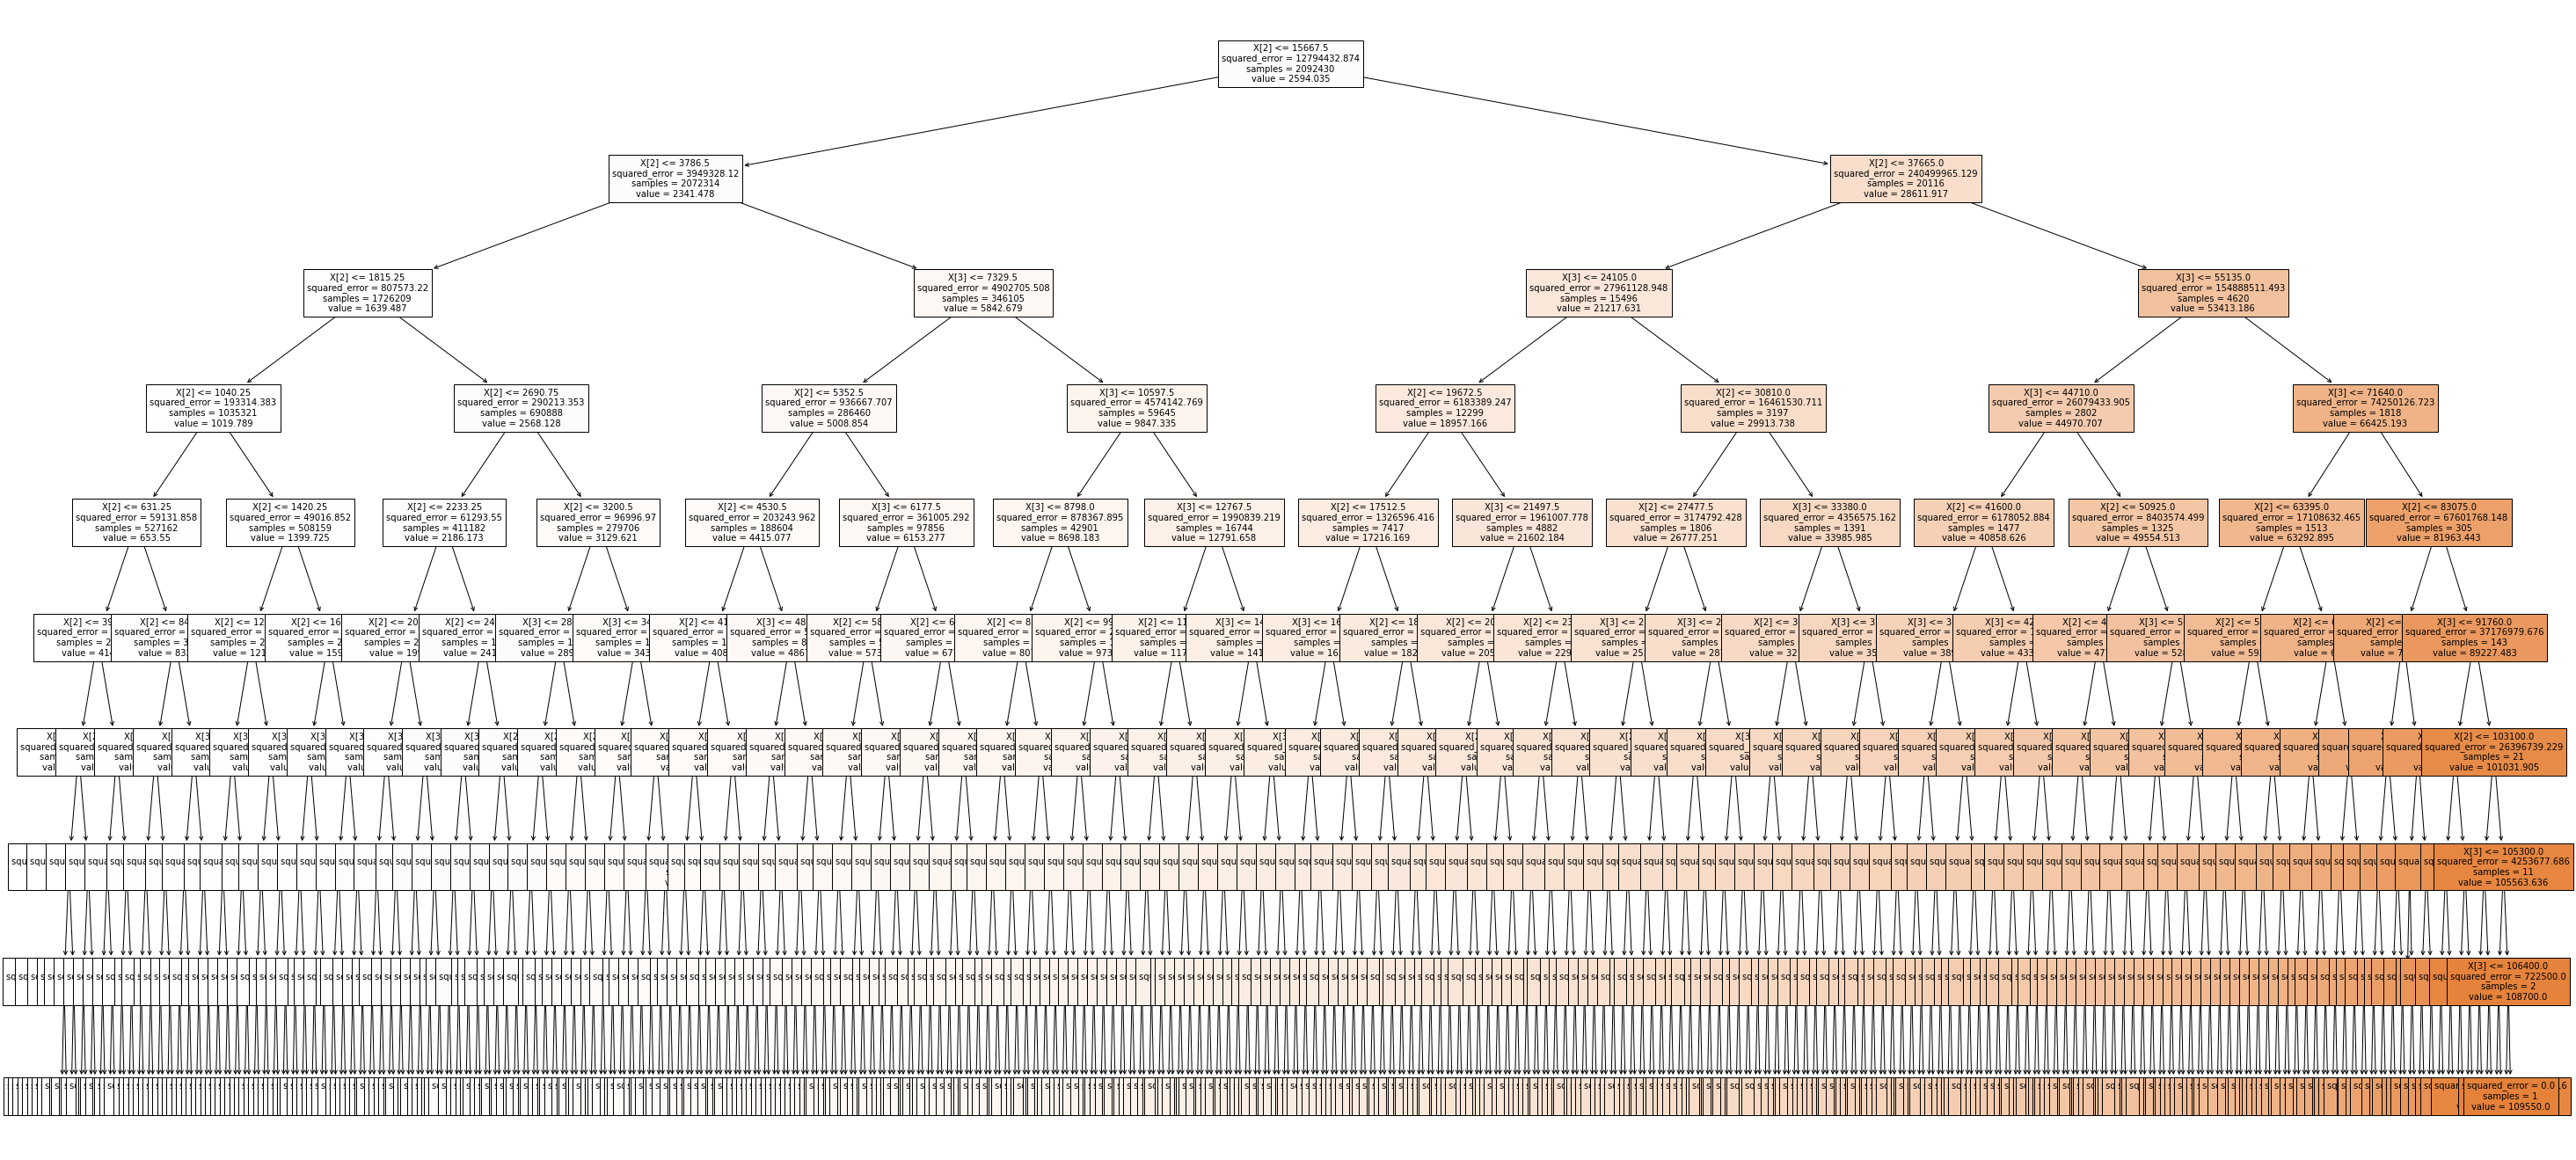

In [16]:
#Vẽ cây decision tree
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(model_1, filled=True, fontsize=10)
plt.savefig('Decision_Tree', dpi=100)
plt.show()